In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist
import random

## Process the data

In [33]:
# x_train: Data to train the model
# y_train: Labels to train the model
(x_train, y_train), (x_test, y_test) = mnist.load_data()
print(f'x_train shape: {x_train.shape}')
print(f'x_test shape: {x_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

x_train shape: (60000, 28, 28)
x_test shape: (10000, 28, 28)
y_train shape: (60000,)
y_test shape: (10000,)


<Figure size 300x300 with 0 Axes>

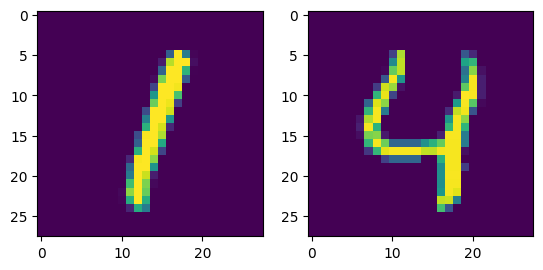

In [34]:
plt.figure(figsize=(3, 3))
f, axarr = plt.subplots(1, 2)
for i in axarr:
    rand = random.randint(1, 10)
    i.imshow(x_train[rand])
    i.imshow(x_test[rand])

In [35]:
from tensorflow.keras.utils import to_categorical

In [36]:
print(f'y_train: {y_train.shape} y_test: {y_test.shape}')
y_cat_train = to_categorical(y_train, num_classes=10) # num_classes can be inferred
y_cat_test = to_categorical(y_test)
print(f'y_cat_test: {y_cat_test.shape} y_cat_train: {y_cat_train.shape}')


y_train: (60000,) y_test: (10000,)
y_cat_test: (10000, 10) y_cat_train: (60000, 10)


In [37]:
# Normalization
print(f'x_train min: {x_train.min()} max: {x_train.max()}, x_test min: {x_test.min()} max: {x_test.max()}')
x_train = x_train / 255
x_test = x_test / 255
print(f'x_train min: {x_train.min()} max: {x_train.max()}, x_test min: {x_test.min()} max: {x_test.max()}')

x_train min: 0 max: 255, x_test min: 0 max: 255
x_train min: 0.0 max: 1.0, x_test min: 0.0 max: 1.0


In [38]:
# Reshape
print(f'x_train shape: {x_train.shape}, x_test shape: {x_test.shape}')
x_train = x_train.reshape(60000, 28, 28, 1) # 1 for grayscale
x_test = x_test.reshape(10000, 28, 28, 1)
# Single color channel added
print(f'x_train shape: {x_train.shape}, x_test shape: {x_test.shape}')

x_train shape: (60000, 28, 28), x_test shape: (10000, 28, 28)
x_train shape: (60000, 28, 28, 1), x_test shape: (10000, 28, 28, 1)


In [39]:
# Build the model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten

In [40]:
# Early stopping
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=1, # Number of epochs with no improvement after which training will be stopped
    )

In [41]:
model = Sequential()

# Convolution Layer
model.add(Conv2D(filters=32, 
                 kernel_size=(4, 4), # * x_train.shape[1] / x_train.shape[2]
                 input_shape=(28, 28, 1), # * Should match our data shape (x_train.shape)
                 padding='valid', 
                 activation='relu'))

model.add(MaxPool2D(pool_size=(2, 2))) #* Half the size of the kernel_size


# Flatten
model.add(Flatten()) # * A flatten layer is required
model.add(Dense(128, activation='relu'))

# * number of neurons should match the number of classes (y_cat_test.shape[1])
# * OUTPUT: softmax - multiclass problem
model.add(Dense(10, activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='adam', 
              metrics=['accuracy'])


In [42]:
# Train the model
model.fit(x_train, y_cat_train, epochs=10, validation_data=(x_test, y_cat_test), callbacks=[early_stop])

Epoch 1/10
  14/1875 [..............................] - ETA: 16s - loss: 1.8137 - accuracy: 0.4643

2023-07-01 10:45:24.057389: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1871/1875 [============================>.] - ETA: 0s - loss: 0.1425 - accuracy: 0.9573

2023-07-01 10:45:37.266262: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 15s 8ms/step - loss: 0.1423 - accuracy: 0.9573 - val_loss: 0.0670 - val_accuracy: 0.9796
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0658 - accuracy: 0.9807 - val_loss: 0.0571 - val_accuracy: 0.9809
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0640 - accuracy: 0.9825 - val_loss: 0.0756 - val_accuracy: 0.9812


In [43]:
metrics = pd.DataFrame(model.history.history)

<Axes: >

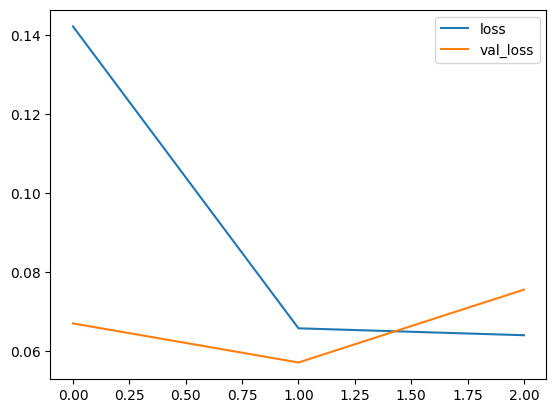

In [44]:
metrics[['loss', 'val_loss']].plot()

<Axes: >

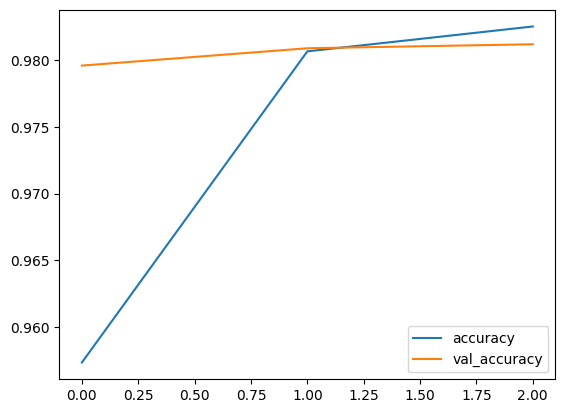

In [45]:
metrics[['accuracy', 'val_accuracy']].plot()

In [46]:
model.evaluate(x_test, y_cat_test, verbose=0)

[0.07556082308292389, 0.9811999797821045]

In [47]:
from sklearn.metrics import classification_report, confusion_matrix

In [48]:
predictions = model.predict(x_test)

101/313 [========>.....................] - ETA: 0s

2023-07-01 10:46:10.630801: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


313/313 [==============================] - 0s 1ms/step


In [49]:
y_cat_test.shape

(10000, 10)

In [50]:
y_cat_test

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [51]:
print(classification_report(y_test, predictions.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.97      0.98      0.98      1032
           3       0.99      0.97      0.98      1010
           4       0.99      0.98      0.98       982
           5       0.97      0.99      0.98       892
           6       0.98      0.99      0.98       958
           7       0.99      0.96      0.98      1028
           8       0.99      0.96      0.98       974
           9       0.97      0.99      0.98      1009

    accuracy                           0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000



In [52]:
import seaborn as sns

<Axes: >

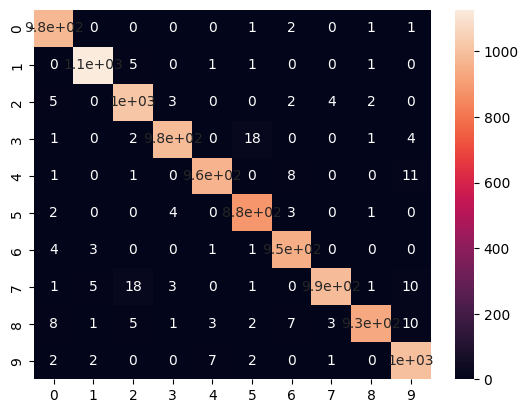

In [53]:
sns.heatmap(confusion_matrix(y_test, predictions.argmax(axis=1)), annot=True)

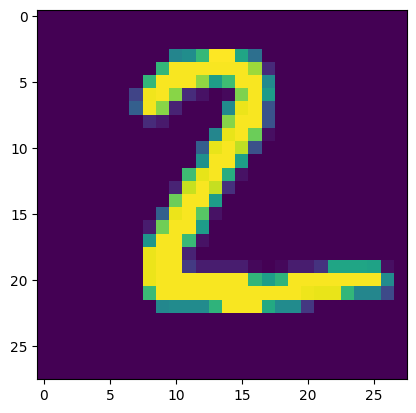

In [55]:
my_number = x_test[1]
plt.imshow(my_number.reshape(28, 28))

In [56]:
prediction = model.predict(my_number.reshape(
    1,  # Number of images
    28, # Width of the size of the training data
    28, # Height of the size of the training data
    1   # Color channels
    ))


1/1 [==============================] - 0s 17ms/step


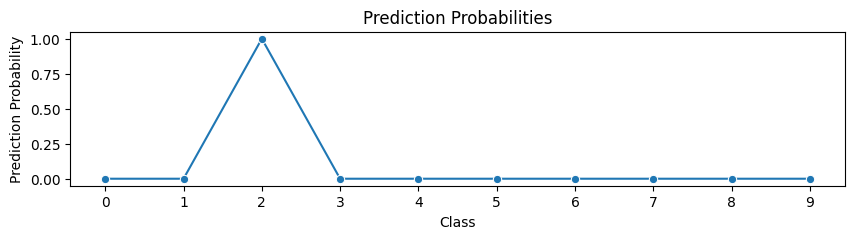

In [57]:
# Classes (e.g., for MNIST these would be the digits 0-9)
classes = [str(i) for i in range(10)]
# Squeeze to remove single-dimensional entries from the shape of an array.
df = pd.DataFrame({'Class': classes, 'Prediction Probability': np.squeeze(prediction)})

# plot the data using seaborn
plt.figure(figsize=(10,2))
sns.lineplot(data=df, x='Class', y='Prediction Probability', marker="o")
plt.title('Prediction Probabilities')
plt.show()

